In [1]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df= pd.read_csv(r'C:/Users/Melanie/Downloads/trainWP.csv' )
test= pd.read_csv(r'C:/Users/Melanie/Downloads/testWP.csv')

print(df.head())
x_train= df.drop('Potability', axis=1)
y_train=df['Potability']

x_test= test.drop('Potability', axis=1)
y_test= test['Potability']


#Scaling data to increase accuracy
scaler=StandardScaler()
x_train_s= scaler.fit_transform(x_train)
x_test_s= scaler.fit_transform(x_test)

# plt.scatter(X[:, 0], y, c=y)
# # plt.scatter(X,y)
# plt.show()

   Unnamed: 0        ph    Hardness       Solids  Chloramines     Sulfate  \
0        1499  6.999765  219.143373  16078.45939     7.652135  355.688892   
1        1264  8.575673  197.560283  15888.62521     4.865463  311.557381   
2        1301  3.433874  152.480075  16318.73361     5.973098  313.064317   
3        2685  8.376280  248.132861  27824.19048     7.100523  343.057975   
4        1685  6.920389  252.352799  11086.25986     9.993376  285.744758   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0    282.502338       17.297556        65.065069   3.360131           1  
1    464.725567       18.736927        40.224521   3.506229           0  
2    412.915539        9.970144        68.507542   4.104938           0  
3    433.449899       18.658886        53.303760   5.703963           0  
4    368.629147       17.120803        43.667082   3.277601           0  


Accuracy not scaled: 0.6737804878048781
[[406  12]
 [202  36]]


<AxesSubplot:>

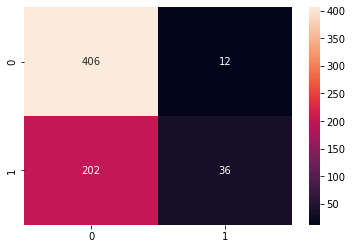

In [2]:
svclassifier= SVC(kernel='rbf', gamma=0.0001)
svclassifier.fit(x_train,y_train)

y_pred= svclassifier.predict(x_test)


print("Accuracy not scaled:",metrics.accuracy_score(y_test, y_pred))

cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)

sns.heatmap(cf_matrix, fmt='d', annot = True)
# print("Hello")

Accuracy: 0.7042682926829268
[[394  24]
 [170  68]]
Accuracy: 0.7195121951219512
[[377  41]
 [143  95]]
Accuracy: 0.725609756097561
[[373  45]
 [135 103]]
Accuracy: 0.725609756097561
[[370  48]
 [132 106]]
Accuracy: 0.7134146341463414
[[364  54]
 [134 104]]
Accuracy: 0.7073170731707317
[[364  54]
 [138 100]]
Accuracy: 0.6996951219512195
[[362  56]
 [141  97]]
Accuracy: 0.698170731707317
[[366  52]
 [146  92]]
Accuracy: 0.6905487804878049
[[368  50]
 [153  85]]
Accuracy: 0.6890243902439024
[[371  47]
 [157  81]]
Accuracy: 0.6920731707317073
[[375  43]
 [159  79]]
Accuracy: 0.6905487804878049
[[384  34]
 [169  69]]

Highest accuracy: 0.725609756097561 where gamma:0.15 
Accuracy: 0.725609756097561
[[373  45]
 [135 103]]


<AxesSubplot:>

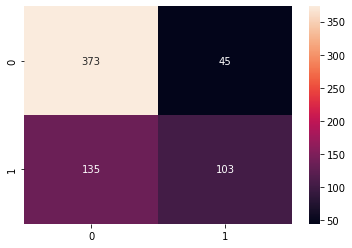

In [3]:
#Testing different gamma values to find the one with the highest accuracy
gammas= [0.05,0.1,0.15,0.2,0.25,0.30,0.35,0.4,0.45,0.5,0.55,0.6]

accuracies=[]

for g in gammas:
    svclassifier= SVC(kernel='rbf', gamma=g)
    svclassifier.fit(x_train_s,y_train)

    y_pred= svclassifier.predict(x_test_s)
    
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    cf_matrix=confusion_matrix(y_test, y_pred)
    print(cf_matrix)

max_accuracy_index=accuracies.index(max(accuracies))
print("\nHighest accuracy: {} where gamma:{} ".format(max(accuracies), gammas[max_accuracy_index]))



# Printing the confusion matrix of the gamma with the highest accuracy
svclassifier= SVC(kernel='rbf', gamma=gammas[max_accuracy_index])
# svclassifier= SVC(kernel='poly', degree=3)
svclassifier.fit(x_train_s,y_train)

y_pred= svclassifier.predict(x_test_s)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, fmt='d', annot = True)

Accuracy: 0.7149390243902439
[[364  54]
 [133 105]]


<AxesSubplot:>

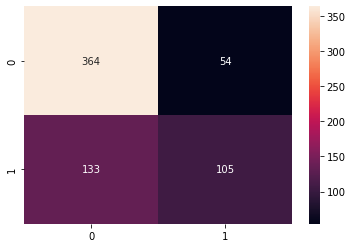

In [4]:
svclassifier= SVC(kernel='poly', coef0=1)
svclassifier.fit(x_train_s,y_train)

y_pred= svclassifier.predict(x_test_s)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, fmt='d', annot = True)